In [1]:
using CSV, DataFrames, StatsPlots

In [2]:
# Read data from CSV file
df = CSV.read("series.csv", DataFrame)
rename!(df, Symbol.(strip.(string.(names(df)))))

Row,xs,ys1,ys2,ys3
,Int64,Int64,Int64,Int64
1,0,5,5,5
2,1,9,12,14
3,2,13,25,41
4,3,17,44,98
5,4,21,69,197
6,5,25,100,350
7,6,29,137,569
8,7,33,180,866
9,8,37,229,1253


In [3]:
# Melt the DataFrame to long format for KDE plot
df_long = stack(df, Not(:xs))

Row,xs,variable,value
,Int64,String,Int64
1,0,ys1,5
2,1,ys1,9
3,2,ys1,13
4,3,ys1,17
5,4,ys1,21
6,5,ys1,25
7,6,ys1,29
8,7,ys1,33
9,8,ys1,37


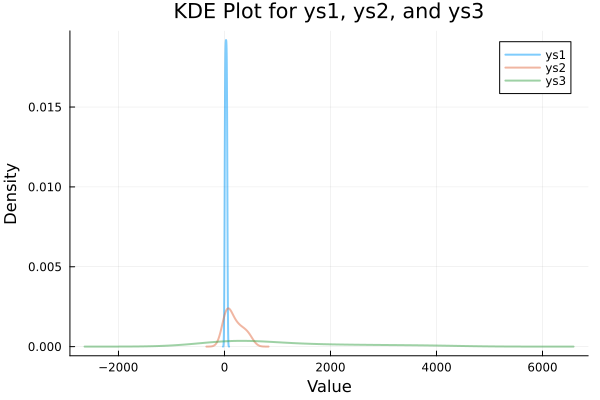

In [4]:
# Create KDE plot using StatsPlots with custom colors
kde_plot = density(
  df_long.value, 
  group = df_long.variable,
  fillalpha = 0.7,
  legend = :topright,
  xlabel = "Value",
  ylabel = "Density",
  title = "KDE Plot for ys1, ys2, and ys3",
  lw = 2, # Line width
  α = 0.5 # Opacity
)